<center>
    <h1>¿Python es rápido o lento?</h1>
    <center><h5>Jiovaniel O. Soto González</h5></center>
    <center><h5>Juan C. Fontánez Castro</h5></center>
    <center><h5>Emmanuel A. Morales Martínez</h5></center>
</center>


# Propósito

- El propósito de esta tarea es divisar la diferencia en velocidad de ejecución de Python contra la librería Numpy para determinar cual de las dos resulta más eficiente al momento de multiplicar arreglos de una y dos dimensiones. A su vez, se pretende entender la utilidad de utilizar librerías al momento de programar.

# Hipótesis

- Numpy va a ejecutar en menos tiempo dado a que condensa las llamadas de las funciones en un comando en lugar de tener que realizar múltiples llamadas para ejecutar la misma acción.

# Conceptos a considerar

- Como se mencionó anteriormente, el tiempo de ejecución es un factor crítico a considerar en este experimento. Este tiempo está directamente influenciado por la cantidad de datos que se procesan, por lo que el tamaño de los arreglos utilizados en las operaciones es un aspecto crucial a tener en cuenta. Además, la eficiencia en la creación de los arreglos, los cuales son utilizados para almacenar múltiples valores en una única variable, también juega un papel significativo, ya que la manera en que se generan puede impactar considerablemente en el tiempo de ejecución.[1] Por lo tanto, la optimización en la creación de los arreglos es otro factor importante a considerar en el diseño del experimento. Finalmente, otra variable a considerar es la reproducibilidad. Esta significa obtener resultados consistentes con los mismos valores de entrada, lo cual es importante para el análisis, ya que nos aseguramos de que los valores de tiempo obtenidos no están siendo manipulados por componentes externos.[2]

# ¿Cómo se configuró el experimento?

- Para la configuración del experimeto se realizaron dos códigos (uno solaamente utilizando python y el otro utilizando Numpy para las operaciones) en los cuales se evalúa el tiempo de ejecución de una multiplicación de arreglos tanto en una como en dos dimensiones. Además, se hizo una multiplicación para los casos de ambas multiplicaciones individualmente para asegurarnos de que los arreglos a los cual se les va a tomar el producto posean la misma dimensión. Sin utilizar Numpy, primero se llevó a cabo la declaración de las definiciones en donde se va a realizar la mulipilicación de los arreglos, que en este caso, se ejecuta atravesando los arreglos número por número. Esto también aplica para la creación de los arreglos que reciben los valores de los arreglos crr=eados como parte de las pruebas. Para calcular el tiempo se implementó una definición que permite obtener el tiempo antes y después de calcular el producto para luego restar el tiempo inicial del tiempo final y obtener el tiempo total de ejecución. Para los casos de prueba, se añaden los tamaños deseados para los arreglos y la función procede a crear dos arreglos de una dimensión y dos arreglos de dos dimensiones de cada uno de los tamaños indicados. El código es el siguiente:

### Python Puro

In [50]:
import time

def product_1d_1d(arr1, arr2):
    
    result = sum(x * y for x, y in zip(arr1, arr2))
    return result

def product_2d_2d(arr1, arr2):

    result = [[sum(a * b for a, b in zip(row, col)) for col in zip(*arr2)] for row in arr1]
    return result

# función que determina el tiempo de ejecución
def time_execution(func, arr1, arr2):
    start_time = time.time()
    func(arr1, arr2)
    end_time = time.time()
    return end_time - start_time

# Test cases
sizes = [5, 50, 500, 1000]  # tamaño de los arreglos
for size in sizes:
    arr1_1d = [i for i in range(size)]
    arr2_1d = [i for i in range(size)]
    arr1_2d = [[i*size + j for j in range(size)] for i in range(size)]
    arr2_2d = [[i*size + j for j in range(size)] for i in range(size)]
    
    time_1d = time_execution(product_1d_1d, arr1_1d, arr2_1d)
    time_2d = time_execution(product_2d_2d, arr1_2d, arr2_2d)
    
    print(f"Arreglos de 1D de tamaño {size}: {time_1d:.6f} segundos")
    print(f"Arreglos de 2D de tamaño {size}x{size}: {time_2d:.6f} segundos")

Arreglos de 1D de tamaño 5: 0.000003 segundos
Arreglos de 2D de tamaño 5x5: 0.000026 segundos
Arreglos de 1D de tamaño 50: 0.000007 segundos
Arreglos de 2D de tamaño 50x50: 0.010467 segundos
Arreglos de 1D de tamaño 500: 0.000043 segundos
Arreglos de 2D de tamaño 500x500: 9.964309 segundos
Arreglos de 1D de tamaño 1000: 0.000080 segundos
Arreglos de 2D de tamaño 1000x1000: 84.610332 segundos


- El segundo código posee la misma nomenclatura que el primero, pero esta vez utiliza la librería Numpy tanto para realizar los arreglos, como para calcular el producto de los arreglos. El código es el siguiente:

### NumPy

In [49]:
import numpy as np
import time

def product_1d_1d(arr1, arr2):
    arr1_np = np.array(arr1)
    arr2_np = np.array(arr2)
    result = arr1_np * arr2_np  # Perform element-wise multiplication
    return result


def product_2d_2d(arr1, arr2):
    arr1_np = np.array(arr1)
    arr2_np = np.array(arr2)
    result = np.dot(arr1_np, arr2_np)
    return result

# Timing function
def time_execution(func, arr1, arr2):
    start_time = time.time()
    func(arr1, arr2)
    end_time = time.time()
    return end_time - start_time

# Test cases
sizes = [5, 50, 500, 1000]  # dimensionalities of arrays
for size in sizes:
    arr1_1d = np.random.rand(size)
    arr2_1d = np.random.rand(size)
    arr1_2d = np.random.rand(size, size)
    arr2_2d = np.random.rand(size, size)
    
    time_taken_1d_1d = time_execution(product_1d_1d, arr1_1d, arr2_1d)
    time_taken_2d_2d = time_execution(product_2d_2d, arr1_2d, arr2_2d)
    
    print(f"Arreglos de 1D de tamaño {size}: {time_taken_1d_1d:.6f} segundos")
    print(f"Arreglos de 2D de tamaño {size}x{size}: {time_taken_2d_2d:.6f} segundos")

Arreglos de 1D de tamaño 5: 0.000051 segundos
Arreglos de 2D de tamaño 5x5: 0.000283 segundos
Arreglos de 1D de tamaño 50: 0.000011 segundos
Arreglos de 2D de tamaño 50x50: 0.000800 segundos
Arreglos de 1D de tamaño 500: 0.000048 segundos
Arreglos de 2D de tamaño 500x500: 0.026231 segundos
Arreglos de 1D de tamaño 1000: 0.000047 segundos
Arreglos de 2D de tamaño 1000x1000: 0.034555 segundos


# Interpretación de la Data Obtenida

- Como fue mencionado anteriormente, loas fatores más importantes pertinentes a este experimento lo son el tamaño de los arreglos a los cuales se les va a calcular el producto, y el tiempo de ejecución, el cual es directamente afectado por el tamaño de los arreglos. Según un artículo dedicado a la eficiencia de python utilizando Numpy y Cython, NumPy permite operaciones rápidas en arreglos multidimensionales, álgebra lineal, Fourier y estructuras de árboles.[2] Además, NumPy sobresale al agrupar eficientemente múltiples valores dentro de matrices, lo que resulta en operaciones más rápidas en comparación con Python puro, que requiere iterar a través de cada valor individualmente.[3] Esta optimización hace que NumPy sea especialmente adecuado para conjuntos de datos más grandes, donde su capacidad para operar de manera eficiente sin la necesidad de bucles explícitos ofrece un rendimiento notable. Al focalizarnos en casos de prueba con una amplia diferencia entre ellos, podemos obtener resultados más distintivos y consistentes. De este modo, evaluamos de manera más efectiva el rendimiento relativo de NumPy frente a Python puro en diferentes escalas de datos.

- Los resultados obtenidos del experimento demuestran que ambos métodos operan en tiempos similares al calcular el producto de dos arreglos de una dimensión, aunque al aumentar el tamaño del arreglo, NumPy fue un poco más rápido. Sin embargo, al evaluar el tiempo de ejecución al calcular el producto de dos arreglos de dos dimensiones, es evidente que los tiempos del producto calculado por NumPy resultan ser mucho más eficientes. A continuación realizamos un código que une los dos códigos presentados anteriormente con el fin de generar gráficas para poder realizar una comparación visual. Del mismo modo, agrupa los valores de una dimensión en una tabla y los de dos dimensiones en otra con el mismo fin. Además, cuenta con un encasillado en la parte inferior para ocultar el código y poder apreciar la información más clara. En este código decidimos tabular el tiempo en milisegundos para que se pudiera apreciar mejor la diferencia de los tiempos, ya que algunos resultados se encuentran por debajo de un segundo. En la gráfica para los arreglos de una dimensión se observa como no hay una diferencia significativa en el tiempo a medida que el tamaño de los arreglos va aumentando dado a que el cambio es de aproximadamente 0.3 milisegundos, pero NumPy obtiene mejores resultados de todos modos. No obstante, la gráfica de los arreglos de dos dimensiones muestra una escala de tiempo de 200,000 milisegundos en comparación con la escala de tiempo en la gráfica de los arreglos de una dimensión la cual es de 0.35 milisegundos. Al analizar los datos obtenidos de las operaciones de multiplicación de matrices bidimensionales, se destaca claramente que a medida que aumenta el tamaño de las matrices, el tiempo de ejecución del código desarrollado únicamente con Python experimenta un crecimiento exponencial. En contraste, los tiempos de ejecución del código implementado con NumPy se mantienen en niveles notablemente bajos. Este patrón observado en los tiempos de ejecución refleja la eficiencia inherente de NumPy en comparación con las operaciones puramente en Python, lo cual está en línea con la información proporcionada por las fuentes citadas anteriormente.

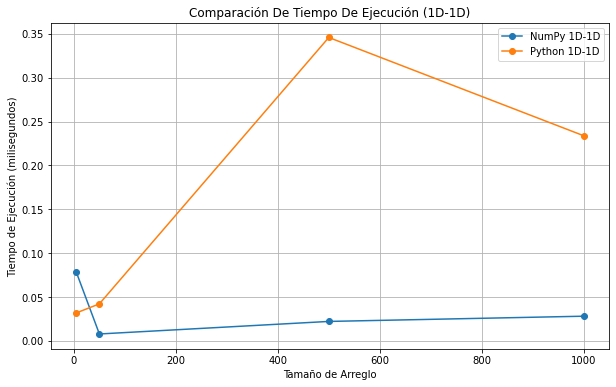

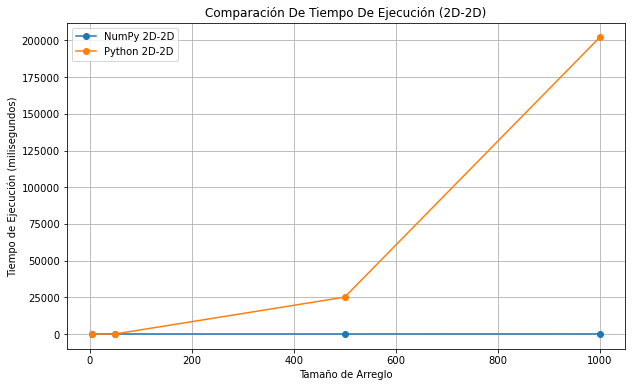

Comparación De Tiempo De Ejecución (1D-1D)
+--------------+-----------+------------+-----------+-----------+
| Tamaño       |         5 |         50 |       500 |      1000 |
+==============+===========+============+===========+===========+
| NumPy 1D-1D  | 0.0779629 | 0.00786781 | 0.0221729 | 0.0281334 |
+--------------+-----------+------------+-----------+-----------+
| Python 1D-1D | 0.0319481 | 0.0422001  | 0.345945  | 0.233889  |
+--------------+-----------+------------+-----------+-----------+


Comparación De Tiempo De Ejecución (2D-2D)
+--------------+----------+----------+-------------+-------------+
| Tamaño       |        5 |       50 |         500 |        1000 |
+==============+==========+==========+=============+=============+
| NumPy 2D-2D  | 0.204086 |  4.41384 |     7.73501 |     33.8302 |
+--------------+----------+----------+-------------+-------------+
| Python 2D-2D | 0.079155 | 29.989   | 25099       | 202048      |
+--------------+----------+----------+----------

In [52]:
from IPython.display import HTML, display

# Hide code, but display output
display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))


import numpy as np
import time
import matplotlib.pyplot as plt

def product_1d_1d_np(arr1, arr2):
    arr1_np = np.array(arr1)
    arr2_np = np.array(arr2)
    result = arr1_np * arr2_np
    return result

def product_2d_2d_np(arr1, arr2):
    arr1_np = np.array(arr1)
    arr2_np = np.array(arr2)
    result = np.dot(arr1_np, arr2_np)
    return result

def product_1d_1d_py(arr1, arr2):
    
    result = sum(x * y for x, y in zip(arr1, arr2))
    return result

def product_2d_2d_py(arr1, arr2):

    result = [[sum(a * b for a, b in zip(row, col)) for col in zip(*arr2)] for row in arr1]
    return result

# Timing function
def time_execution(func, arr1, arr2):
    start_time = time.time()
    func(arr1, arr2)
    end_time = time.time()
    return (end_time - start_time) * 1000  # Convertir en milisegundos para que se visualizar mejor

# Test cases
sizes = [5, 50, 500, 1000]  # Tamaños de los arreglos

execution_times_np_1d = []
execution_times_np_2d = []
execution_times_py_1d = []
execution_times_py_2d = []

for size in sizes:
    arr1_1d = np.random.rand(size)
    arr2_1d = np.random.rand(size)
    arr1_2d = np.random.rand(size, size)
    arr2_2d = np.random.rand(size, size)
    
    time_np_1d = time_execution(product_1d_1d_np, arr1_1d, arr2_1d)
    time_np_2d = time_execution(product_2d_2d_np, arr1_2d, arr2_2d)
    time_py_1d = time_execution(product_1d_1d_py, arr1_1d, arr2_1d)
    time_py_2d = time_execution(product_2d_2d_py, arr1_2d, arr2_2d)
    
    execution_times_np_1d.append(time_np_1d)
    execution_times_np_2d.append(time_np_2d)
    execution_times_py_1d.append(time_py_1d)
    execution_times_py_2d.append(time_py_2d)

# Plotting 1D-1D
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times_np_1d, marker='o', linestyle='-', label='NumPy 1D-1D')
plt.plot(sizes, execution_times_py_1d, marker='o', linestyle='-', label='Python 1D-1D')
plt.title('Comparación De Tiempo De Ejecución (1D-1D)')
plt.xlabel('Tamaño de Arreglo')
plt.ylabel('Tiempo de Ejecución (milisegundos)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting 2D-2D
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times_np_2d, marker='o', linestyle='-', label='NumPy 2D-2D')
plt.plot(sizes, execution_times_py_2d, marker='o', linestyle='-', label='Python 2D-2D')
plt.title('Comparación De Tiempo De Ejecución (2D-2D)')
plt.xlabel('Tamaño de Arreglo')
plt.ylabel('Tiempo de Ejecución (milisegundos)')
plt.legend()
plt.grid(True)
plt.show()

# Table for 1D-1D comparison
table_data_1d_1d = [
    ["Tamaño", *sizes],
    ["NumPy 1D-1D", *execution_times_np_1d],
    ["Python 1D-1D", *execution_times_py_1d]
]

print("Comparación De Tiempo De Ejecución (1D-1D)")
print(tabulate(table_data_1d_1d, headers="firstrow", tablefmt="grid"))
print("\n")

# Table for 2D-2D comparison
table_data_2d_2d = [
    ["Tamaño", *sizes],
    ["NumPy 2D-2D", *execution_times_np_2d],
    ["Python 2D-2D", *execution_times_py_2d]
]

print("Comparación De Tiempo De Ejecución (2D-2D)")
print(tabulate(table_data_2d_2d, headers="firstrow", tablefmt="grid"))


# Conclusión

- Los resultados del experimento revelan que mientras Python puro y NumPy pueden tener tiempos similares al calcular el producto de arreglos unidimensionales, NumPy muestra una eficiencia notablemente superior al trabajar con arreglos bidimensionales. La capacidad de NumPy para realizar operaciones en matrices de manera eficiente, sin la necesidad de utilizar iteraciones explícitas, se destaca especialmente en conjuntos de datos más grandes. Este estudio refuerza la idea de que NumPy es una herramienta invaluable para operaciones numéricas y de álgebra lineal, ofreciendo un rendimiento consistente y eficiente incluso en matrices de gran tamaño, en contraste con las operaciones puramente en Python, que experimentan un crecimiento exponencial en el tiempo de ejecución a medida que aumenta el tamaño de las matrices.

# ¿Qué Aprendimos?

- Luego de culminar el experimento, aprendimos la importancia de utilizar librerías para nuestros códigos en lugar de tener que manualmente declarar todas las funciones en un código. Además de que se tiene que escribir menos código, minimizando errores en la sintaxis y reduciendo el tiempo que toma escribirlo, también tienen la capacidad de condensar procesos que normalmente toman muchos pasos, agilizando el tiempo de ejecución, lo cual los puede hacer más eficientes.

# Reparto de Tareas

- Jiovaniel Soto - Encargado de escribir el informe, proveyó del código de NumPy y narró los slides de conceptos a considerar y la configuración del experimento.
- Juan Fontánez - Organizó y resumió información para la presentación y se encargó de la elaboración de el video. Proporcionó el código de Python y narró la primera parte del video.
- Emmanuel Morales - Se encargó del código utilizado para generar las gráficas y resumió información del reporte para la presentación. Adicional a esto, narró la parte de la información, la conclusión y el aprendizaje, culminando el video. 
- Todos los integrantes se reunieron para discutir el análisis de los datos.

# Referencias

- [1] “Listas (arreglos o vectores) en Python: Uso y creación,” www.programarya.com. https://www.programarya.com/Cursos/Python/estructuras-de-datos/listas

- [2] S. G. de Sierra, “Reproducibilidad: ¿qué es y por qué importa?,” Sebastián Garrido de Sierra. https://www.datacrunchers.mx/blog/reproducibilidad-que-es-por-que-importa#:~:text=%22la%20reproducibilidad%20es%20obtener%20resultados (accessed Feb. 26, 2024).

- [3] Morra, Gabriele (2018). [Lecture Notes in Earth System Sciences] Pythonic Geodynamics || Fast Python: NumPy and Cython. , 10.1007/978-3-319-55682-6(Chapter 3), 35–60. doi:10.1007/978-3-319-55682-6_3

- [4] NumPy, “What is NumPy? — NumPy v1.19 Manual,” numpy.org, 2022. https://numpy.org/doc/stable/user/whatisnumpy.html